In [20]:
import easyocr
from matplotlib import pyplot as plt 
import numpy as np 
import cv2

import pandas as pd
import numpy as np

from PIL import Image
from glob import glob
from tqdm.notebook import tqdm



In [57]:
img_path='../input/receptis/selangor-malaysia-december-view-paper-check-receipt-receipt-records-sale-goods-selangor-malaysia-december-view-237767253.jpeg'
img_fns = glob('../input/receptis/*')


# pytesseract

in order to associate each image with its  annotation  : just the image ID  

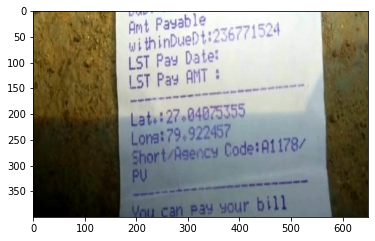

In [37]:
plt.imshow(plt.imread(img_fns[0]))

# #easyOCR


In [1]:
import easyocr

reader = easyocr.Reader(['en'], gpu = True)
results = reader.readtext(img_fns[9])
pd.DataFrame(results, columns=['bbox','text','conf'])
pd.DataFrame(results, columns=['text'])

NameError: name 'img_fns' is not defined

In [65]:
top_left = tuple(results[0][0][0])
bottom_right = tuple(results[0][0][2])
text = results[0][1]
font = cv2.FONT_HERSHEY_SIMPLEX


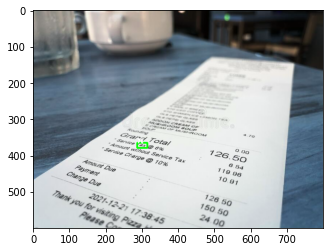

In [66]:
img = cv2.imread(img_path)
img = cv2.rectangle(img,top_left,bottom_right,(0,255,0),3)
img = cv2.putText(img,text,top_left, font, 0.5,(255,255,255),2,cv2.LINE_AA)
plt.imshow(img)
plt.show()

for multiple lines 


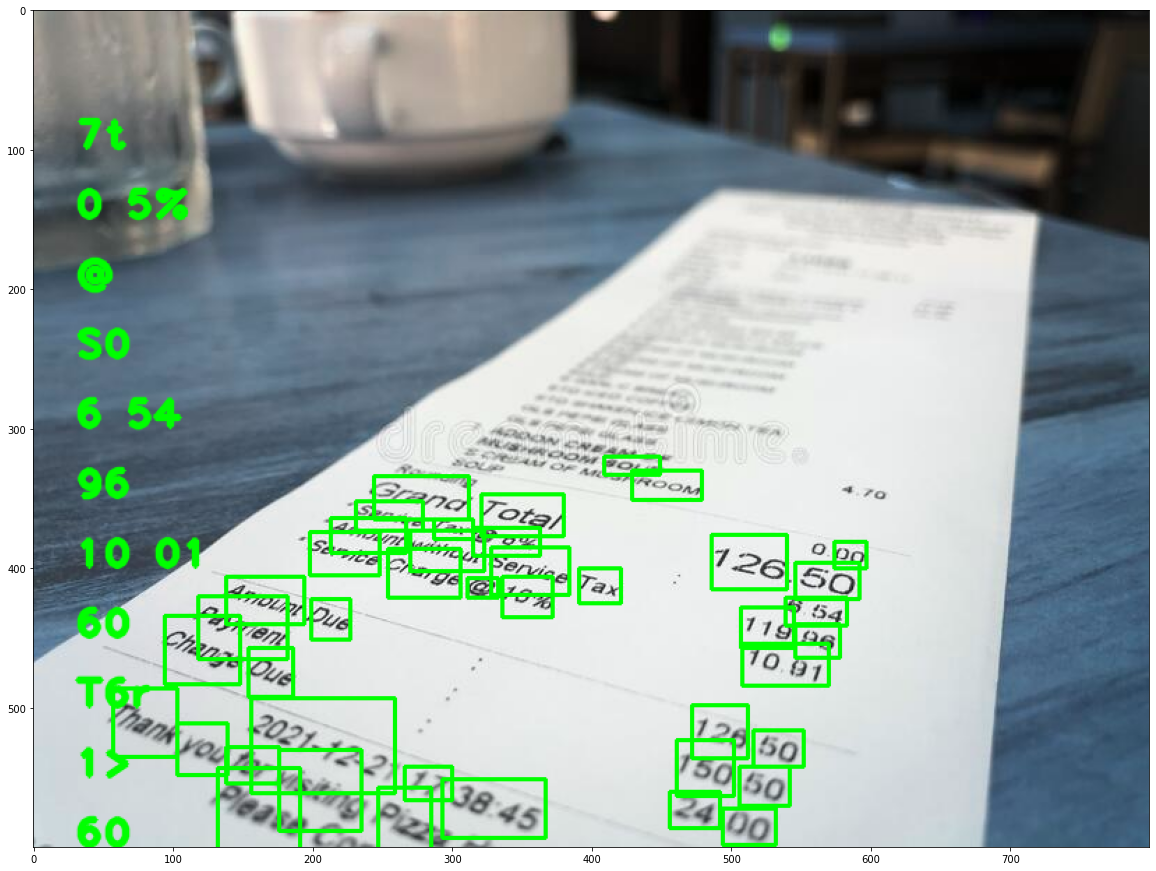

In [67]:
img = cv2.imread(img_path)
spacer = 100
for detection in results: 
    top_left = tuple(detection[0][0])
    top_left = tuple([int(val) for val in detection[0][0]])
    bottom_right = tuple(detection[0][2])
    bottom_right=tuple(int(val) for val in detection[0][2])
    text = detection[1]
    font=cv2.FONT_HERSHEY_PLAIN
    img = cv2.rectangle(img,top_left,bottom_right,(0,255,0),2)
    img = cv2.putText(img,text,(30,spacer), font, 2,(0,255,0),3,cv2.LINE_AA)
    spacer+=50
plt.figure(figsize=(20,20))    
plt.imshow(img)
plt.show()

#keras OCR 


In [ ]:
!pip install keras-ocr -q

In [ ]:
import keras_ocr
pipeline = keras_ocr.pipeline.Pipeline()

In [ ]:
result2= pipeline.recognize([img_path])

In [ ]:
pd.DataFrame(result2[0], columns=['text', 'bbox'])

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
keras_ocr.tools.drawAnnotations(plt.imread(img_path), result2[0], ax=ax)
ax.set_title('Keras OCR Result Example')
plt.show()

ref" : keras detected more text than easyocr